In [1]:
from mynotebook import *

# import all players from ai_simple3.py
from ai_clairvoyant5 import *

# NOTE: you'll need to re-run this import to use any changes 
# made in that file or files it depends on.  If you can't
# see them, try restarting your notebook kernel.

# other imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# jupyter notebook specific setup
%matplotlib inline




/Users/RayH/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
class ExperimentalParams():
    pass

pr = ExperimentalParams()

## shared experimental parameters ##

pr.bankroll = 50    # starting player balance
pr.min_bet = 1         # min allowed bet
pr.num_deck = 4        # number decks in shoe
pr.inf_deck = False     # True if using infinte deck
pr.seed = None         # seed value to assign before every run
#num_round = 1000      # number rounds to play
#num_round = 10**3
pr.num_round = 10**4
#pr.num_round = 10**5
#num_round = 10**6


## other parameters ##
# have Game print a reasonable number of rounds:
pr.print_n = 1 if pr.num_round <= 20 else max(1, math.ceil(pr.num_round/math.log2(pr.num_round)))
pr.print_n = 0         # suppess round printing entirely

### initialize shoe
pr.shoe = Shoe(pr.num_deck, infinite=False,cards=[])

### Initialize the player
# last number is other bet!
p1 = AIPlayerClairvoyant(pr.bankroll, pr.min_bet, pr.shoe, 0.05)
p2 = AIPlayerClairvoyant(pr.bankroll, pr.min_bet, pr.shoe, 0.22)
p3 = AIPlayerClairvoyant(pr.bankroll, pr.min_bet, pr.shoe, 0.4)


### run the games
g1 = runPlayer(p1, pr)
g2 = runPlayer(p2, pr)
g3 = runPlayer(p3,pr)

games = [g1, g2, g3] # list of game.runs


Setting up a game with AIPlayerClairvoyant
Starting..
Finished
Total Rounds 10000 [Wins: 4334 Losses: 4863 Ties: 803]
tot_bet = 9.3044701185703e+19 tot_won = 1.1061527628275794e+20 (won-bet)=1.7570575097054937e+19
E(won-bet) = 1757057509705493.8 (won-bet)/tb = 0.18884014751132097 EG = -0.00853499999999987
EG 95% CI = (-0.028626909622405817, 0.011556909622405801)
edge = 1.188840147511321

Setting up a game with AIPlayerClairvoyant
Starting..
Finished
Total Rounds 10000 [Wins: 4355 Losses: 4794 Ties: 851]
tot_bet = 2.1147961085116273e+70 tot_won = 2.2593353371639672e+70 (won-bet)=1.4453922865233991e+69
E(won-bet) = 1.4453922865233992e+65 (won-bet)/tb = 0.06834664962291102 EG = 0.00122500000000005
EG 95% CI = (-0.018843115690532878, 0.021293115690532851)
edge = 1.068346649622911

Setting up a game with AIPlayerClairvoyant
Starting..
Finished
Total Rounds 832 [Wins: 332 Losses: 415 Ties: 85]
tot_bet = 87986.26470123854 tot_won = 87937.21384794693 (won-bet)=-49.05085329161375
E(won-bet) = 

In [3]:
for g in games:
    print(g.playerClass + ':') 
    print(g.df.describe())
    print()
 

AIPlayerClairvoyant:
             round           bet          gain  final_bankroll   gain_factor
count  10000.00000  1.000000e+04  1.000000e+04    1.000000e+04  10000.000000
mean    5000.50000  9.304470e+15  1.757058e+15    4.861307e+17     -0.008535
std     2886.89568  7.230183e+16  7.681837e+16    2.332152e+18      1.024992
min        1.00000  1.000000e+00 -1.027241e+18    6.137360e+00     -1.000000
25%     2500.75000  1.000000e+00 -1.000000e+00    9.570175e+02     -1.000000
50%     5000.50000  1.000000e+00  0.000000e+00    6.938420e+08      0.000000
75%     7500.25000  3.385362e+03  1.000000e+00    8.036535e+13      1.000000
max    10000.00000  1.027241e+18  1.738253e+18    2.054482e+19      1.950000

AIPlayerClairvoyant:
             round           bet          gain  final_bankroll   gain_factor
count  10000.00000  1.000000e+04  1.000000e+04    1.000000e+04  10000.000000
mean    5000.50000  2.114796e+66  1.445392e+65    3.023519e+67      0.001225
std     2886.89568  2.231028e+67 

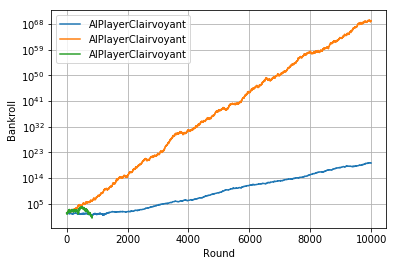

In [4]:
### compare equity curves
fig,ax = plt.subplots()
ax.set_yscale('log')  # Can use log scale for crazy moneymakers, 
                        # not needed w/GoodLuck, BadLuck.
for g in games:
    ax.plot(g.df[['final_bankroll']], label=g.playerClass)
ax.set_xlabel("Round")
ax.set_ylabel("Bankroll")
ax.legend(loc='best')
ax.grid('on')

In [5]:
## The mean comparison test
## Tells us, for expected gains for ALL, blackjack, and busts only whether the strategies produce similar enough
## resuls. When are two strategies the same? When are they different? 

def estimate_EG_CI(gdf, prnt=None):
    """Returns EG and 95% CI estimates (EG, CI_low, CI_high)
    Prints results using EGgiven{prnt} = when prnt is set to a string"""
    m = gdf['gain'].mean()
    sem = gdf['gain'].std()/(gdf['gain'].count())**.5
    c_low = m-1.96*sem
    c_high = m+1.96*sem
    if prnt is not None:
        print('EGgiven{} = {:3.6f}, 95% confidence interval = [{:3.4f},{:3.4f})'.format(prnt, m, c_low, c_high))
        return (m, c_low, c_high)
    
BJ = ['D_BJ', 'P_BJ', 'PD_BJ']
HS = ['P_Bust', 'D_Bust', 'P_Won', 'P_Lost', 'PD_Draw']
ALL = BJ + HS
name_set = (('ALL',ALL), ('BJ', BJ), ('HS', HS))

print(g1.playerClass+ '(A) -vs- '+ g2.playerClass + '(B)')
for name,set in name_set:
    eg1 = estimate_EG_CI(g1.df[g1.df['type'].isin(set)], prnt=name)
    eg2 = estimate_EG_CI(g2.df[g2.df['type'].isin(set)], prnt=name)
    if eg1[2] < eg2[1]:
        print('A < B: *A is LESS*')
    elif eg2[2] < eg1[1]:
        print('A > B: *A is MORE*')
    else: 
        print('A = B: *A EQUAL B*')

print()
print(g2.playerClass+ '(B) -vs- '+ g3.playerClass + '(C)')
for name,set in name_set:
    eg1 = estimate_EG_CI(g2.df[g1.df['type'].isin(set)], prnt=name)
    eg2 = estimate_EG_CI(g3.df[g2.df['type'].isin(set)], prnt=name)
    if eg1[2] < eg2[1]:
        print('A < B: *A is LESS*')
    elif eg2[2] < eg1[1]:
        print('A > B: *A is MORE*')
    else: 
        print('A = B: *A EQUAL B*')   

print()
print(g1.playerClass+ '(A) -vs- '+ g3.playerClass + '(C)')
for name,set in name_set:
    eg1 = estimate_EG_CI(g1.df[g1.df['type'].isin(set)], prnt=name)
    eg2 = estimate_EG_CI(g3.df[g2.df['type'].isin(set)], prnt=name)
    if eg1[2] < eg2[1]:
        print('A < B: *A is LESS*')
    elif eg2[2] < eg1[1]:
        print('A > B: *A is MORE*')
    else: 
        print('A = B: *A EQUAL B*')      

AIPlayerClairvoyant(A) -vs- AIPlayerClairvoyant(B)
EGgivenALL = 1757057509705494.000000, 95% confidence interval = [251417372668817.2500,3262697646742171.0000)
EGgivenALL = 144539228652340033298981551076652299586501581071404551363807412224.000000, 95% confidence interval = [-277213618013092466103507884578442212780829209703905256125358931968.0000,566292075317772579469523381320640194471747018767770987842815131648.0000)
A = B: *A EQUAL B*
EGgivenBJ = 9787163340782900.000000, 95% confidence interval = [3122730064191355.0000,16451596617374444.0000)
EGgivenBJ = 520245512830205928898583972117619325476208752164073963560365981696.000000, 95% confidence interval = [143973753582866960167679407658824708024595642919039274752237633536.0000,896517272077544944397540931165307325445736508330165281358335705088.0000)
A < B: *A is LESS*
EGgivenHS = 946355423709900.625000, 95% confidence interval = [-567756652242596.1250,2460467499662397.5000)
EGgivenHS = 1053754993829158554128808333970290642375024919772417

# Phase 5 Writeup: AI Player Clairvoyant Betting

   Notebook Task: Fine a good value for other_bet.  Explain why and how you selected
   other_bet.  Use equity curves and statistics as appropriate.

In order to find a good betting amount, I ran three AIClairvoyants against each other with three different other_bets. Initially, I was looking at other_bets > 1 but quickly realized that AI Clairvoyant does so well that multiplying min_bet by some number wasn't going to come close to capturing the highest maximum winnings. So I started experimenting with other_bets < 1, so that the the player was betting percentages of his bankroll. This yielded extremely high winnings, though winnings were maximized within the range 0.20 < bankroll < 0.30. For my final runs (and what's handed in here), I set player1 to other_bet = .05, player2 to other_bet = 0.22, and player3 to other_bet = .40. Looking at equity curves, you can see that all three players made a ton of money, but that player2 with an other_bet of 0.22 (orange in graph) performed best. Player1 (other_bet=0.05, blue in graph) performed worst and player3 (other_bet=0.40,green in graph) performed second best. 

The mean comparison test returns the result that all three players are equal, but this is because the confidence intervals for Player 2 and Player 3 include negative EGs on the lower bound, causing them to overlap with each other and Player 1. Looking at EGgivenALL for each player suggests that, indeed, Player 2's strategy yields the highest EG. Setting other_bet to anything beyond ~ 0.30 can be quite risky because, if the player performs very poorly in their first few rounds, they can lose such a high proportion of their bankrolls that they go bankrupt. 

Player 1: EGgivenALL = 110092886690011200.000000
Player 2: EGgivenALL = 2254306394760364107623752819255715416307187861929590784.000000
Player 3: EGgivenALL = 8235512101561558056858884587893681095020904448.000000

(^ These values will change with new runs) 

Below, you can find an analysis for AIPlayerClairvoyant vs AIPlayerXray. The writeup is at the bottom of the notebook.

In [6]:
# import all players from ai_simple3.py
from ai_simple3 import *
from ai_perfect4 import *

from mynotebook import *

# NOTE: you'll need to re-run this import to use any changes 
# made in that file or files it depends on.  If you can't
# see them, try restarting your notebook kernel.

# other imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# jupyter notebook specific setup
%matplotlib inline


class AIPlayerGoodLuck(AIPlayerBadLuck):
    """Player assumes the dealer will always bust, so always stands."""
    def next_move(self):
        return 's'

class AIPlayerXray(AIPlayerGoodLuck):
    """Adjusts bet based on dealer's hole card, otherwise always stands."""
    def __init__(self, bankroll, min_bet, shoe, other_bet=1):
        """The player adjusts it's bet to be either min_bet or
        self.other_bet*self.min_bet (for other_bet>=1) and
        other_bet*self.bankroll (for other_bet < 1) (when possible)."""
        super().__init__(bankroll, min_bet)
        self.shoe = shoe
        self.other_bet = other_bet

    def bet(self):
        if self.shoe.infinite:
            state = random.getstate () # save random number generator state
            hole_card = shoe.deal(1)[0] # deal card
            random.setstate(state)  # reset random number generator state
        else:
            hole_card = self.shoe.cards[self.shoe.next_card] # peek ahead in list

        if hole_card.name in ['2','3','4','5','6']:
            if self.other_bet >= 1:
                b = self.min_bet * self.other_bet
            else:
                b = self.bankroll * self.other_bet
        else:
            b = self.min_bet

        b = min(self.bankroll,b)
        # print(hole_card.name, b)
        return b if b > self.min_bet else self.min_bet

In [7]:
## Clairvoyant VS XRay

class ExperimentalParams():
    pass

pr1 = ExperimentalParams()

## shared experimental parameters ##

pr1.bankroll = 500    # starting player balance
pr1.min_bet = 2         # min allowed bet
pr1.num_deck = 4        # number decks in shoe
pr1.inf_deck = False     # True if using infinite deck
pr1.seed = None         # seed value to assign before every run
# number rounds to play
#pr1.num_round = 10**2
#pr1.num_round = 10**3
pr1.num_round = 10**4
#pr1.num_round = 10**5
#pr1.num_round = 10**6

## other parameters ##
# have Game print a reasonable number of rounds:
pr1.print_n = 1 if pr1.num_round <= 20 else max(1, math.ceil(pr1.num_round/math.log2(pr1.num_round)))
pr1.print_n = 0         # suppess round printing entirely

### initialize shoe
random.seed(pr1.seed)
pr1.shoe = Shoe(pr1.num_deck, infinite=False, cards=[]) # create shoe here to allow peeking

### initialize the players to compare
p3 = AIPlayerXray(pr1.bankroll, pr1.min_bet, pr1.shoe,other_bet=5)
p4 = AIPlayerClairvoyant(pr1.bankroll, pr1.min_bet,pr1.shoe, other_bet=5)


### run the games
g3 = runPlayer(p3, pr1)
g4 = runPlayer(p4, pr1)

games1 = [g3, g4] # list of game.runs


Setting up a game with AIPlayerXray
Starting..
Finished
Total Rounds 10000 [Wins: 3869 Losses: 5641 Ties: 490]
tot_bet = 50960.0 tot_won = 50636.40000000026 (won-bet)=-323.5999999997366
E(won-bet) = -0.03235999999997366 (won-bet)/tb = -0.006350078492930468 EG = -0.13349999999999881
EG 95% CI = (-0.15370242963424707, -0.11329757036575294)
edge = 0.9936499215070695

Setting up a game with AIPlayerClairvoyant
Starting..
Finished
Total Rounds 10000 [Wins: 4183 Losses: 5014 Ties: 803]
tot_bet = 47648.0 tot_won = 54378.200000000244 (won-bet)=6730.2000000002445
E(won-bet) = 0.6730200000000245 (won-bet)/tb = 0.14124832102082446 EG = -0.04415000000000029
EG 95% CI = (-0.06407047291914765, -0.024229527080852364)
edge = 1.1412483210208244


In [8]:
for g in games1:
    print(g.playerClass + ':') 
    print(g.df.describe())
    print()

AIPlayerXray:
             round           bet          gain  final_bankroll  gain_factor
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.00000
mean    5000.50000      5.096000     -0.032360      533.191860     -0.13350
std     2886.89568      3.896704      6.679848      160.334642      1.03063
min        1.00000      2.000000    -10.000000      108.600000     -1.00000
25%     2500.75000      2.000000     -2.000000      440.000000     -1.00000
50%     5000.50000      2.000000     -2.000000      514.200000     -1.00000
75%     7500.25000     10.000000      2.000000      632.325000      1.00000
max    10000.00000     10.000000     19.500000      974.800000      1.95000

AIPlayerClairvoyant:
             round           bet          gain  final_bankroll   gain_factor
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000
mean    5000.50000      4.764800      0.673020     3814.697140     -0.044150
std     2886.89568      3.804698      6.256384   

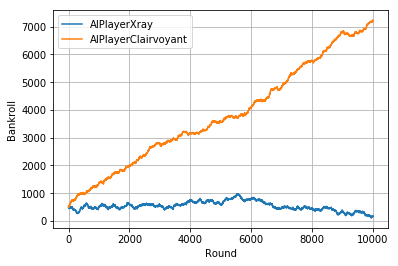

In [9]:
### compare equity curves
fig,ax = plt.subplots()
# ax.set_yscale('log')  # Can use log scale for crazy moneymakers, 
                        # not needed w/GoodLuck, BadLuck.
for g in games1:
    ax.plot(g.df[['final_bankroll']], label=g.playerClass)
ax.set_xlabel("Round")
ax.set_ylabel("Bankroll")
ax.legend(loc='best')
ax.grid('on')

In [10]:
BJ = ['D_BJ', 'P_BJ', 'PD_BJ']
HS = ['P_Bust', 'D_Bust', 'P_Won', 'P_Lost', 'PD_Draw']
ALL = BJ + HS
name_set = (('ALL',ALL), ('BJ', BJ), ('HS', HS))

print(g3.playerClass+ '(A) -vs- '+ g4.playerClass + '(B)')
for name,set in name_set:
    eg1 = estimate_EG_CI(g3.df[g3.df['type'].isin(set)], prnt=name)
    eg2 = estimate_EG_CI(g4.df[g4.df['type'].isin(set)], prnt=name)
    if eg1[2] < eg2[1]:
        print('A < B: *A is LESS*')
    elif eg2[2] < eg1[1]:
        print('A > B: *A is MORE*')
    else: 
        print('A = B: *A EQUAL B*')

AIPlayerXray(A) -vs- AIPlayerClairvoyant(B)
EGgivenALL = -0.032360, 95% confidence interval = [-0.1633,0.0986)
EGgivenALL = 0.673020, 95% confidence interval = [0.5504,0.7956)
A < B: *A is LESS*
EGgivenBJ = 3.928927, 95% confidence interval = [3.4171,4.4407)
EGgivenBJ = 3.543388, 95% confidence interval = [3.0289,4.0579)
A = B: *A EQUAL B*
EGgivenHS = -0.435166, 95% confidence interval = [-0.5669,-0.3034)
EGgivenHS = 0.383930, 95% confidence interval = [0.2608,0.5070)
A < B: *A is LESS*


# Phase 5 Writeup: Compare AIPlayerClairvoyant with AIPlayerXRay

Compare AIPlayerClairvoyant with AIPlayerXray, using non-fractional and fractional betting strategies. What is the difference in their edges?

At first,I ran AIPlayerClairvoyant against AIPLayerXray using an other_bet = 0.15 for both. The shoe was not infinite, with it holding a total of 4 decks. AIPlayerClairvoyant easily outperformed AIPlayerXray. Its edge, calculated as total wins / total bets, was 1.158, while AIPlayerXray had an edge of 0.893. Not only that, but AIPlayerXRay quickly ran out of money and ended the rounds early, while AIClairvoyant completed all 10,000 rounds and won oodles and oodles of money. So I lowered other_bet to a much more conservative 0.05 for both. At 0.05, AIPlayerClairvoyant had an edge of 1.30 and Xray had an edge of 1.026. Xray also did not run out of money and made it through all 10,000 rounds.

I changed the betting strategy for both to 5.0 (non-fractional). Once again, AIPlayerXRay ran out of money before it could complete 10,000 rounds, though it ran out of money less quickly than before. This makes sense, as it's not betting a fraction of its bankroll, it's betting a multiple of min_bet which is a more conservative strategy. AIPlayerClairvoyant made it to the end and made a ton of money (as usual). This time, AIPlayerXRay had an edge of ~0.98 and AIPlayerClairvoyant had an edge of ~ 1.145. These numbers explain why XRay ran out of money — this AI loses 2 cents per every dollar bet! Comparison tests back up this analysis, with AI Clairvoyant yielding a statistically higher EGgivenALL and EGgivenHS. 